# Regression Algorithms to Predict Ratings of Spotify Songs

**This notebook trains classical, tree-based, bagging and boosting regression models using a user rated playlist and predicts reviews on a global spotify dataset to further create playlists based on audio attributes. The following playlists will be outputed for the user:<br/>**
    - Chill Playlist
    - Dance Playlist
    - Unpopular/Discover Playlist
**Regression Models used:<br/>**
    - Linear Regression
    - Decision Trees 
    - Random Forest
    - Ada Boosting
**Evaluation methods: <br/>**
    - Root Mean Squared Error
    - Cross Validation Error

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('spotify_dat.csv')

In [3]:
df.head()

,Unnamed: 0,name,uri,album_uri,album_name,album_popularity,artist_uri,artist_name,artist_popularity,artist_followers,...,overall_key_2,overall_key_3,overall_key_4,overall_key_5,overall_key_6,overall_key_7,overall_key_8,overall_key_9,overall_key_10,overall_key_11
0,0,Keep It Alive! Instro (Instrumental),spotify:track:0nDyuRDSaYF0Zf9XHpKFsU,spotify:album:21J9q0qN5O76XkGVUQLsM9,Windmills of the Soul Instrumentals,41,spotify:artist:5EXuZB9s9F3ezkS7zpV8d1,Kero One,45,37949,...,0,0,0,0,0,0,0,0,1,0
1,1,Take Time,spotify:track:2QqAVlaV6Y45ebsXxfS5i8,spotify:album:2LlpsGgyRXwpGYSrD7yuFQ,Matte Black Soul,42,spotify:artist:2M9OIHcdVSxhPVCYQ3z5Rf,Awon,52,15673,...,0,0,0,0,0,0,0,1,0,0
2,2,Heart of Courage,spotify:track:4JtvyWkWQTPVcroZf8JJkp,spotify:album:0zOdkaCbYN1B42zw8TUYlY,Invincible,67,spotify:artist:6BF0bXbsdujMSMeFZBGcBq,Thomas Bergersen,71,145336,...,0,0,0,0,0,0,0,0,0,0
3,3,See You All,spotify:track:5N6ExqlJEaxbxuZLTq4ZpR,spotify:album:5P6LOcFYoRoLlh4TDxuSFY,Goodbye,39,spotify:artist:6EfilTfy7TJQI7KXitffIq,Koudlam,37,11998,...,0,0,0,0,0,0,0,0,0,1
4,4,I'm So,spotify:track:6gQI4RLH0RLwNMyyz8JIQ3,spotify:album:4uWPjCwslbnaA8JANTBjaU,Andrew Applepie,45,spotify:artist:5BYcwjrQth7em7maAt0yKE,Andrew Applepie,55,49244,...,0,1,0,0,0,0,0,0,0,0


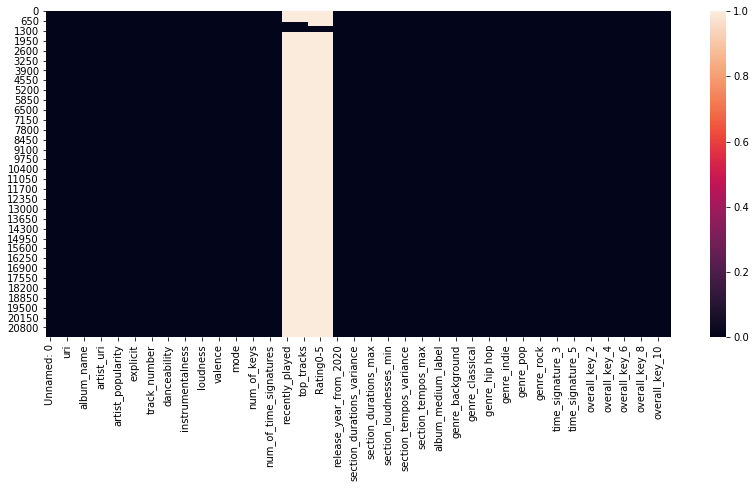

In [4]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull())

In [5]:
rows = df.shape[0]
columns = df.shape[1]
print("Dataset has {} rows and {} columns".format(rows,columns))

Dataset has 21445 rows and 74 columns


In [6]:
# Check the numerical columns.
int_columns = df.select_dtypes(include=["int", "int8", "int16", "int32", "int64", "float"])
nr_int_columns = len(int_columns.columns)
int_over_columns = round((nr_int_columns/columns)*100, 2)
print("We have a total of {} numerical columns in the DF. Thi is roughly {}% of all columns.".format(nr_int_columns, \
                                                                                                       int_over_columns))

We have a total of 67 numerical columns in the DF. Thi is roughly 90.54% of all columns.


In [7]:
# Check for categorical columns
cat_columns = df.select_dtypes(exclude=["int", "int8", "int16", "int32", "int64", "float"])
nr_cat_columns = len(cat_columns.columns)
cat_over_columns = round((nr_cat_columns/columns)*100, 2)
print("We have a total of {} cathegorical columns in the DF. Thi is roughly {}% of all columns.".format(nr_cat_columns, \
                                                                                                       cat_over_columns))

We have a total of 7 cathegorical columns in the DF. Thi is roughly 9.46% of all columns.


In [8]:
df.describe()

,Unnamed: 0,album_popularity,artist_popularity,artist_followers,explicit,popularity,track_number,acousticness,danceability,energy,...,overall_key_2,overall_key_3,overall_key_4,overall_key_5,overall_key_6,overall_key_7,overall_key_8,overall_key_9,overall_key_10,overall_key_11
count,21445.000000,21445.00000,21445.000000,2.144500e+04,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,...,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.00000,21445.000000,21445.000000,21445.000000,21445.000000
mean,10722.000000,60.56554,75.714059,3.948994e+06,0.274423,54.542038,6.186151,0.325030,0.592534,0.570421,...,0.099790,0.034647,0.071345,0.084822,0.069294,0.09965,0.072651,0.087713,0.071019,0.077314
std,6190.782597,20.75665,12.551087,7.454352e+06,0.446233,21.542553,7.230325,0.339922,0.185395,0.253807,...,0.299727,0.182888,0.257407,0.278623,0.253959,0.29954,0.259569,0.282883,0.256862,0.267095
min,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5361.000000,56.00000,68.000000,3.142890e+05,0.000000,55.000000,1.000000,0.038100,0.472000,0.426000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,10722.000000,65.00000,77.000000,1.362178e+06,0.000000,61.000000,4.000000,0.181000,0.611000,0.615000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,16083.000000,73.00000,83.000000,3.615876e+06,1.000000,67.000000,9.000000,0.563000,0.733000,0.762000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,21444.000000,100.00000,100.000000,5.998448e+07,1.000000,100.000000,105.000000,0.996000,0.986000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'uri', 'album_uri', 'album_name',
       'album_popularity', 'artist_uri', 'artist_name', 'artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'mode',
       'num_of_sections', 'num_of_keys', 'num_of_modes',
       'num_of_time_signatures', 'df_label', 'recently_played', 'saved_tracks',
       'top_tracks', 'Rating01', 'Rating0-5', 'AddPlylst01',
       'release_year_from_2020', 'duration_minutes',
       'section_durations_variance', 'section_durations_min',
       'section_durations_max', 'section_loudnesses_variance',
       'section_loudnesses_min', 'section_loudnesses_max',
       'section_tempos_variance', 'section_tempos_min', 'section_tempos_max',
       'album_big_label', 'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'ge

**Distribution of Ratings**

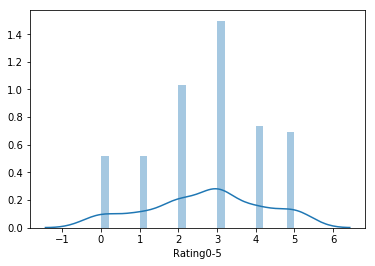

In [10]:
sns.distplot(df['Rating0-5'], bins=25)

**Distribution of artist popularity**

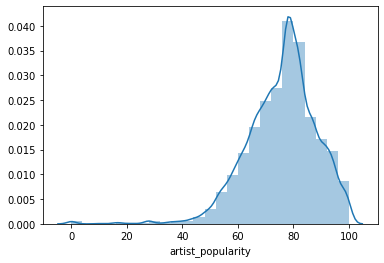

In [8]:
sns.distplot(df['artist_popularity'], bins=25)

In [7]:
cols = ['Rating0-5', 'album_popularity', 'artist_popularity', 'artist_followers', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
       'num_of_sections', 'num_of_keys', 'num_of_modes', 'num_of_time_signatures', 'release_year_from_2020', 'duration_minutes',
       'section_durations_variance', 'section_durations_min', 'section_durations_max', 'section_loudnesses_variance',
       'section_loudnesses_min', 'section_loudnesses_max', 'section_tempos_variance', 'section_tempos_min', 'section_tempos_max',
       'album_big_label', 'album_medium_label',
       'genre_alternative metal/rock', 'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11']

In [8]:
data = df[cols]

In [9]:
data = data[data['Rating0-5'].notnull()]

In [10]:
y = data.iloc[:,0]
x = data.iloc[:,1:]

In [11]:
y.shape

(374,)

In [12]:
x.shape

(374, 58)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as RSqaured

In [14]:
SEED = 101

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=SEED)

**Linear Regression**

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)
print("Test set RMSE of lr: {:.2f}".format(rmse_lr))

Test set RMSE of lr: 1.33


**Decision Tree**

In [18]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [19]:
y_pred_dt = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred_dt)
rmse_dt = mse_dt**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.49


In [20]:
y_pred_train_dt = dt.predict(X_train)
rmse_train_dt = (MSE(y_train, y_pred_train_dt))**(1/2)
print('Train RMSE: {:.2f}'.format(rmse_train_dt))

Train RMSE: 0.92


In [21]:
mse_dt_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 

rmse_dt_CV = (mse_dt_CV_scores.mean())**(1/2)

print('CV RMSE: {:.2f}'.format(rmse_dt_CV))

CV RMSE: 1.59


**Random Forest**

In [22]:
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=5,random_state=SEED, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.31
Train set RMSE of rf: 0.75


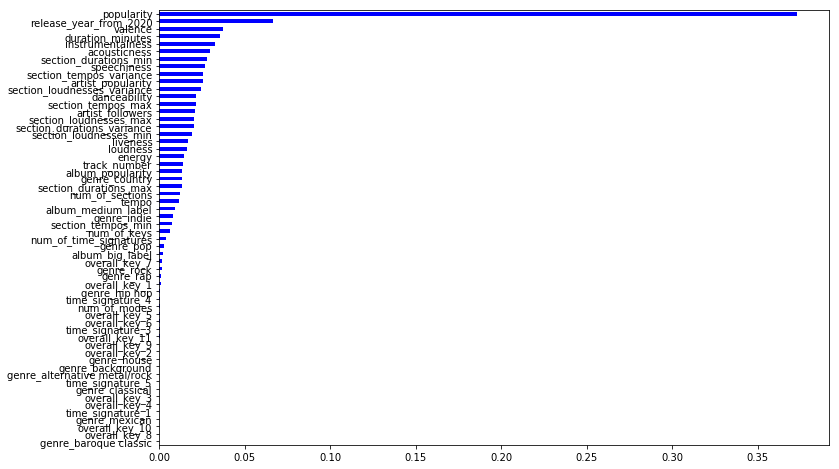

In [23]:
plt.figure(figsize=(12,8))
importances_rf = pd.Series(rf.feature_importances_, index = x.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [24]:
# Find best parameters using GridSearchCV
rf2 = RandomForestRegressor(random_state=SEED)
param_grid = { 
    'n_estimators': range(100,800, 100),
    'max_depth' : range(2,8),
    'min_samples_leaf': range(1,5)
}

In [25]:
CV_rf = GridSearchCV(estimator=rf2, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rf.fit(X_train, y_train)

/Users/abhishekyadav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 800, 100), 'max_depth': range(2, 8), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
CV_rf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}

In [27]:
rf_best = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, max_depth=4,
                                random_state=SEED, n_jobs=-1)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)
y_pred_train_rf_best=rf_best.predict(X_train)
rmse_test_rf_best = MSE(y_test, y_pred_rf_best)**(1/2)
rmse_train_rf_best = MSE(y_train, y_pred_train_rf_best)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_rf_best))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train_rf_best))


Test set RMSE of rf: 1.31
Train set RMSE of rf: 0.91


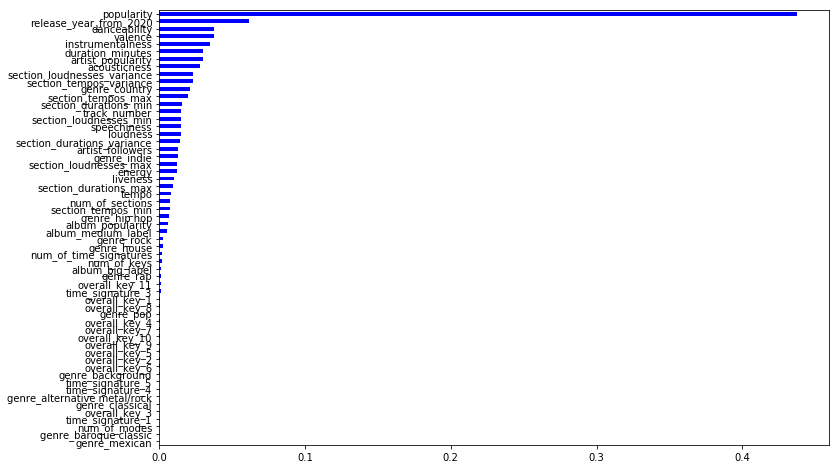

In [28]:
plt.figure(figsize=(12,8))
importances_rf_best = pd.Series(rf_best.feature_importances_, index = x.columns)
sorted_importances_rf_best = importances_rf_best.sort_values()
sorted_importances_rf_best.plot(kind='barh', color='blue')
plt.show()

**Gradient Boosting**

In [175]:
gb = GradientBoostingRegressor(max_depth=4, n_estimators=400, random_state=SEED)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_train_gb = gb.predict(X_train)
rmse_test_gb = MSE(y_test, y_pred_gb)**(1/2)
rmse_train_gb = MSE(y_train, y_pred_train_gb)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_gb))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train_gb))

Test set RMSE of rf: 1.35
Train set RMSE of rf: 0.00


**Picking the best model and making predictions**

In [52]:
global_data = df[df['Rating0-5'].isnull()]

In [53]:
holdout = global_data[cols].drop(['Rating0-5'], axis=1)

In [54]:
holdout.shape

(21071, 58)

In [55]:
predictions = rf_best.predict(holdout)

In [56]:
holdout['PredictedReviews'] = predictions.tolist()

In [57]:
holdout['uri'] = global_data['uri']
holdout['name'] = global_data['name']
holdout['album_name'] = global_data['album_name']
holdout['album_uri'] = global_data['album_uri']
holdout['artist_name'] = global_data['artist_name']
holdout['artist_uri'] = global_data['artist_uri']

In [58]:
holdout.sort_values(by='PredictedReviews', ascending=False).head()

,album_popularity,artist_popularity,artist_followers,popularity,track_number,acousticness,danceability,energy,instrumentalness,liveness,...,overall_key_9,overall_key_10,overall_key_11,PredictedReviews,uri,name,album_name,album_uri,artist_name,artist_uri
370,39,36,5386,7,2,0.12700,0.536,0.777,0.000000,0.0977,...,0,0,0,4.363652,spotify:track:74gKUExTS1d2Yj4WoZektF,Awake,Bianca Ryan,spotify:album:4mAToiuP7G4FiXfl9W3oGl,Bianca Ryan,spotify:artist:0SGZfHICh9e4oEXS8zGOXt
13,36,37,9611,32,2,0.00183,0.615,0.791,0.330000,0.3480,...,0,0,1,4.362471,spotify:track:1hNIwhkrj4SRi8XKfMTGmB,It's So Hard,Dinner With FAT Beatz,spotify:album:7EVVZvjBhYR7Tx50tNlqye,JK Soul,spotify:artist:0OINA1IEY4yNLRFD5n10uS
216,18,27,35401,0,16,0.33300,0.688,0.557,0.000000,0.0994,...,0,1,0,4.335788,spotify:track:4KQ0HNQvr6JZgerYQueosE,Liar - Radio Edit,Motown: The Complete No. 1's,spotify:album:78kJS9OWjuPrYccf3E54yb,Profyle,spotify:artist:4WC2Edj7Ruq94JH2jkC5hB
661,51,57,301958,50,2,0.04510,0.755,0.901,0.037300,0.3630,...,1,0,0,4.328390,spotify:track:2DNdEpV9UnsYjL6w1Dp1aS,That's Not My Name,We Started Nothing,spotify:album:1aWIPcWf3fDEZT6geXjCfU,The Ting Tings,spotify:artist:2wvUfjKGoXvcnDHq7GgMOa
822,0,66,233794,0,2,0.00620,0.429,0.903,0.000002,0.0721,...,0,0,0,4.320295,spotify:track:2QU7jMIPWphYvwnS6GOAMe,Shot of Tears,Vital Signs,spotify:album:5HP7NSiuFplqgGM6OA5IRq,The Revivalists,spotify:artist:5kuJibJcwOC53s3OkoGMRA


**Distribution of Predicted Reviews**

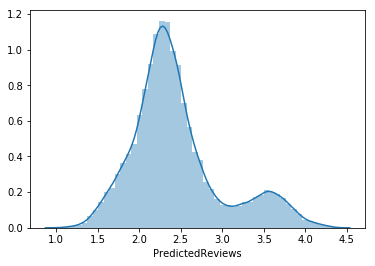

In [59]:
sns.distplot(holdout['PredictedReviews'])

In [80]:
col = ['name', 'uri', 'album_name', 'album_uri', 'artist_name', 'artist_uri', 'PredictedReviews']

**Dance Playlist**

In [81]:
dance_playlist = holdout[holdout['danceability'] > 0.7].sort_values(by='PredictedReviews', ascending=False).head(10)[col]

In [82]:
dance_playlist['model'] = "Random Forest Regressor"

In [90]:
dance_playlist.to_csv('dance_playlist_rfRegressor.csv')

**Chill Playlist**

In [84]:
chill_playlist = holdout[(holdout['tempo'] > 0.95) & (holdout['valence'] > 0.5)].sort_values(by='PredictedReviews', ascending=False).head(10)[col]

In [85]:
chill_playlist['model'] = "Random Forest Regressor"

In [91]:
chill_playlist.to_csv('chill_playlist_rfRegressor.csv')

**Unpopular/Discover Playlist**

In [87]:
unpopular_playlist = holdout[(holdout['popularity'] < 60) & (holdout['artist_popularity'] < 80)].sort_values(by='PredictedReviews', ascending=False).head(10)[col]

In [88]:
unpopular_playlist['model'] = "Random Forest Regressor"

In [92]:
unpopular_playlist.to_csv('unpopular_playlist_rfRegressor.csv')